
## 9 th analisis 
### PARA: 
  `CORRELACIONES- TEST DE HIPOTESIS`
===================================================================

# ANALISIS DE data DE NANOPARTICULAS DE ORO
### EDA
#### Autora: Josefina Cresta

### Importación de librerias

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Tratamiento de data
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
import scipy.stats as ss

# Configuración matplotlib
# ==============================================================================
#plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Mis funciones
# ==============================================================================
%run -i funcionTestDeHipotesis.py

## Importación de base de data

In [2]:
data = pd.read_csv("Au_nanoparticle_dataset.csv")

In [9]:
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E', 'Formation_E']
data= data.loc[:,cols]
data
data.head(4)

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_avg,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890


In [10]:
#Lista de variables locales
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E', 'Formation_E']

#Diccionario de traduccioón
traduccion={"ID":           "ID",
            "T":            "Temp",
            "tau":          "Crecimiento", 
            "time":         "Tiempo",
            "N_total":      "N_total",
            "N_bulk":       "N_bulk",
            "N_surface":    "N_super", 
            "Volume":       "Volumen",
            "R_avg":        "Radio",
            "Avg_total":    "Coord_all",
            "Avg_bulk":     "Coord_bulk",
            "Avg_surf":     "Coord_super",
            "N_bonds":      "N_enlaces",
            "Avg_bonds":    "Long_enlaces",
            "Total_E":      "Total_E",
            "Formation_E":  "Energia_Forma",
}

In [11]:
data = data[cols].rename(columns=traduccion)

In [12]:
data["E_atomo"]=data.Total_E/data.N_total

In [13]:
data.sample(6)

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_all,Coord_bulk,Coord_super,N_enlaces,Long_enlaces,Total_E,Energia_Forma,E_atomo
2274,2275,723,0.000000,10,529,266,263,8.960000e-27,11.7533,10.5482,12.5977,8.4753,2790,2.92729,-1849.7697,218.6203,-3.496729
1214,1215,523,0.000000,10,298,130,168,5.040000e-27,9.4012,9.8859,12.1769,8.1131,1473,2.87321,-1045.1640,120.0160,-3.507262
3569,3570,923,0.000000,10,1921,1255,666,3.250000e-26,18.8477,10.6434,11.8343,8.3994,10223,2.94705,-6628.7292,882.3808,-3.450666
1161,1162,473,0.000175,2,775,410,365,1.310000e-26,13.5322,10.6116,12.5049,8.4849,4112,2.92221,-2786.0692,244.1808,-3.594928
1346,1347,523,0.000000,10,840,476,364,1.420000e-26,13.8070,10.4738,12.1176,8.3242,4399,2.89172,-3012.7708,271.6292,-3.586632
1679,1680,523,0.000000,10,3054,2190,864,5.170000e-26,22.0390,11.0262,12.0557,8.4167,16837,2.89870,-11182.0280,759.1120,-3.661437


<AxesSubplot:>

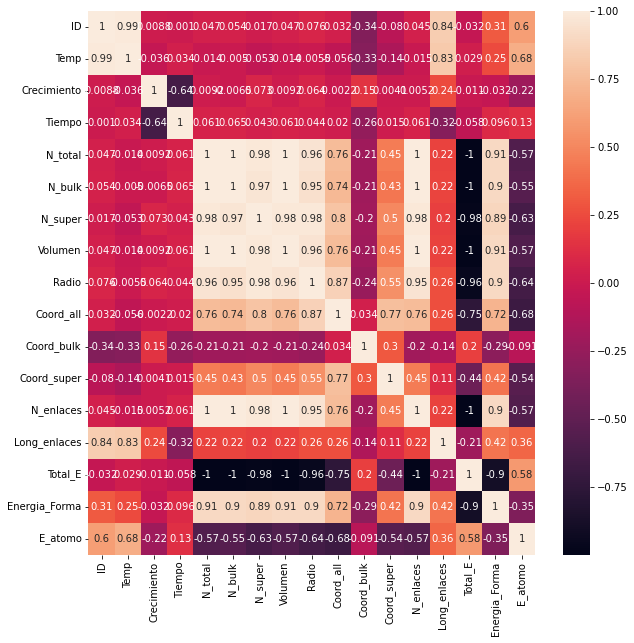

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

# Chicha teorica
La correlación lineal es un método estadístico que permite cuantificar la relación lineal existente entre dos variables. Existen varios estadísticos, llamados coeficientes de correlación lineal, desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son Pearson, Spearman y Kendall.

es importante destacar que, la existencia de correlación entre dos variables, no implica necesariamente causalidad. La asociación observada puede deberse a un tercer factor

Correlación lineal con Python 

Existen múltiples implementaciones que permiten calcular correlaciones lineales en Python, tres de las más utilizadas están disponibles en las librerías: SciPy, Pandas y Pingouin. A lo largo de este documento se muestran ejemplos de cómo utilizarlas. 

Covarianza


Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la covarianza, que mide el grado de variación conjunta de dos variables aleatorias.

Covarianza muestral=𝐶𝑜𝑣(𝑋,𝑌)=∑𝑛𝑖=1(𝑥𝑖−𝑥⎯⎯⎯)(𝑦𝑖−𝑦⎯⎯⎯)𝑁−1

Valores positivos indican que las dos variables cambian en la misma dirección y, valores negativos, que lo hacen en direcciones opuestas.

La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación y poder hacer comparaciones consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación. 

Coeficientes de correlación lineal


Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

0: asociación nula.

0.1: asociación pequeña.

0.3: asociación mediana.

0.5: asociación moderada.

0.7: asociación alta.

0.9: asociación muy alta.

Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos data y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras. 


Significancia estadística


Además del valor obtenido para el coeficiente de correlación, es necesario calcular su significancia estadística. Por muy cercano que sea el valor del coeficiente de correlación a  +1 o  −1, si no es significativo, no se dispone de evidencias suficiente para afirmar que existe una correlación real, ya que el valor observado podría deberse a simple aleatoriedad.

El test paramétrico de significancia estadística empleado para el coeficiente de correlación es el t-test. Donde el estadístico t se obtiene acorde a la ecuación:

𝑡=𝑟𝑁−2‾‾‾‾‾‾√1−𝑟2‾‾‾‾‾‾√

  es el calor del coeficiente de correlación y N es el número de observaciones disponibles. Los grados de libertad se calculan como  𝑑𝑓=𝑁−2


En este test, se considera como hipótesis nula ( 𝐻0) que las variables son independientes (coeficiente de correlación poblacional = 0), y como hipótesis alternativa ( 𝐻𝑎), que sí existe relación (coeficiente de correlación poblacional  ≠ 0)



Tamaño de efecto


La correlación lineal, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado conocido como coeficiente de determinación  𝑅2

𝑅2 se interpreta como la cantidad de varianza de  𝑌 explicada por  𝑋

En el caso del coeficiente de Pearson y el de Spearman,  𝑅2
  se obtiene elevando al cuadrado el coeficiente de correlación. 
  https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html#Tamaño-de-efecto

Coeficiente de Pearson


El coeficiente de correlación de Pearson es la covarianza estandarizada.

𝜌=𝐶𝑜𝑣(𝑋,𝑌)𝜎𝑥𝜎𝑦

 
La anterior ecuación se corresponde con el coeficiente de Pearson poblacional ( 𝜌
ρ
 ). En la práctica, raramente se tiene acceso a toda la población, por lo que su valor se estima a partir de una muestra mediante el coeficiente de Pearson muestral ( 𝑟
r
 ).

𝑟𝑥𝑦=∑𝑛𝑖=1(𝑥𝑖−𝑥⎯⎯⎯)(𝑦𝑖−𝑦⎯⎯⎯)∑𝑛𝑖=1(𝑥𝑖−𝑥⎯⎯⎯)2∑𝑛𝑖=1‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√(𝑦𝑖−𝑦⎯⎯⎯)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯

 
Condiciones 

Las condiciones que se deben de cumplir para que el coeficiente de correlación de Pearson sea válido son:

La relación que se quiere estudiar es de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

Las dos variables deben de ser numéricas.

Normalidad: ambas variables se tienen que distribuir de forma normal. En la práctica, se suele considerar válido aun cuando se alejan moderadamente de la normalidad.

Homocedasticidad: la varianza de  𝑌
Y
  debe ser constante a lo largo de la variable  𝑋
X
 . Esto se puede contrastar si en un scatterplot los valores de  𝑌
Y
  mantienen la misma dispersión en las distintas zonas de la variable  𝑋
X
 . 


Características 

Toma valores entre [-1, +1], siendo +1 una correlación lineal positiva perfecta y -1 una correlación lineal negativa perfecta.

Es independiente de las escalas en las que se midan las variables.

No varía si se aplican transformaciones a las variables.

No tiene en consideración que las variables sean dependientes o independientes.

El coeficiente de correlación de Pearson no equivale a la pendiente de la recta de regresión.

Es sensible a outliers, por lo que se recomienda, en caso de poder justificarlos, excluirlos antes de realizar el cálculo. 
https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html#Coeficiente-de-Pearson

# 1er Test de Hipotesis 

Un estudio pretende analizar si existe una correlación lineal entre El numero de atomos en la nanoparticula y su energia por atomo.

Análisis gráfico


En primer lugar se representan las dos variables mediante un diagrama de dispersión (scatterplot) para intuir si existe relación lineal o monotónica. Si no la hay, no tiene sentido calcular este tipo de correlaciones.

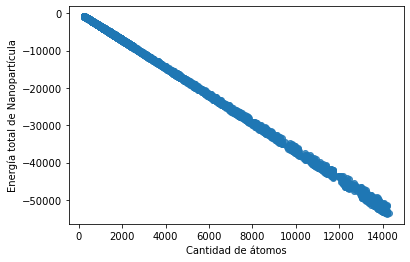

In [15]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data.N_total, y=data.Total_E, alpha= 0.8)
ax.set_xlabel('Cantidad de átomos')
ax.set_ylabel('Energía total de Nanopartícula');

El diagrama de dispersión parece indicar una relación lineal positiva entre ambas variables.

Para poder elegir el coeficiente de correlación adecuado, se tiene que analizar el tipo de variables y la distribución que presentan. 
En este caso, ambas variables son cuantitativas continuas y pueden ordenarse para convertirlas en un ranking, por lo que, a priori, los tres coeficientes podrían aplicarse. La elección se hará en función de la distribución que presenten las observaciones: normalidad, homocedasticidad y presencia de outliers.

### Normalidad

Text(0, 0.5, 'counts')

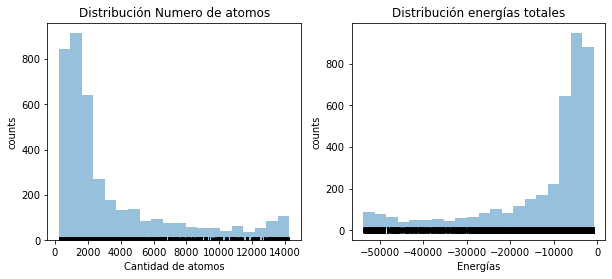

In [17]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=data.N_total, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(data.N_total, np.full_like(data.N_total, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución cantidad  de átomos')
axs[0].set_xlabel('Cantidad de atomos')
axs[0].set_ylabel('counts')

axs[1].hist(x=data.Total_E, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(data.Total_E, np.full_like(data.Total_E, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución energías totales')
axs[1].set_xlabel('Energías')
axs[1].set_ylabel('counts')



El análisis gráfico y los test estadísticos muestran evidencias de que no se puede asumir normalidad en ninguna de las dos variables. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall

Pandas

Pandas permite calcular la correlación de dos Series (columnas de un DataFrame). El cálculo se hace por pares, eliminando automáticamente aquellos con valores NA/null. Una limitación de Pandas es que no calcula la significancia estadística.



In [19]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', data['N_total'].corr(data['Total_E'], method='pearson'))
print('Correlación spearman: ', data['N_total'].corr(data['Total_E'], method='spearman'))
print('Correlación kendall: ', data['N_total'].corr(data['Total_E'], method='kendall'))

Correlación Pearson:  -0.9997159715927578
Correlación spearman:  -0.9997337066842367
Correlación kendall:  -0.9871614141064027


Scypy.stats

La implementación de Scypy.stats sí permite calcular la significancia estadística además del coeficiente de correlación. La función stats.pearsonr(), devuelve un error si alguna de las observaciones contienen valores NA/null. Las funciones stats.spearmanr() y stats.kendalltau() sí permiten excluirlos de forma automática si se indica nan_policy='omit'.



In [21]:

# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(data['N_total'], data['Total_E'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['N_total'], data['Total_E'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['N_total'], data['Total_E'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=-0.9997159715927577, p-value=0.0
Correlación Spearman: r=-0.9997337066842367, p-value=0.0
Correlación Pearson: r=-0.9871614141064027, p-value=0.0


Conclusión


Los test estadísticos muestran una correlación lineal inversa alta, con claras evidencias estadísticas de que la relación observada no se debe al azar ( 𝑝𝑣𝑎𝑙𝑢𝑒≈0 ). 

# Si lo hacemos con todas las columnas de esta tabla

In [ ]:

for i in range(len(data.columns)-1):
    for j in range(i+1, len(data.columns)):
        #Hacemos una tabla cruzada de la columna i con la j
        #y la metemos en un data frame
        alpha = 0.05
        p=ss.chi2_contingency(pd.DataFrame(pd.crosstab(data[data.columns[i]], data[data.columns[j]])))[1]
        #print("*"*40+"\n", p)
        if p <= alpha:
            print(data.columns[i], "con", data.columns[j], "\n\t p_valor:", p, '--> Dependencia(rechazamos H0)')
        # else:
        #     print(data.columns[i], "con", data.columns[j], "\n\t p_valor:", p, '--> Independencia(aceptamos H0)')

# Con super funcion

Hipótesis
	 Nula (H0): No exite relación entre Total_E y N_total
	 Alternativa (HA): Sí exite relación entre Total_E y N_total
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=-0.9997159715927577, p-value=0.0
	Correlación Spearman: r=-0.9997337066842367, p-value=0.0
	Correlación Pearson: r=-0.9871614141064026, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre Total_E y N_total
********************************************************************************


0.0

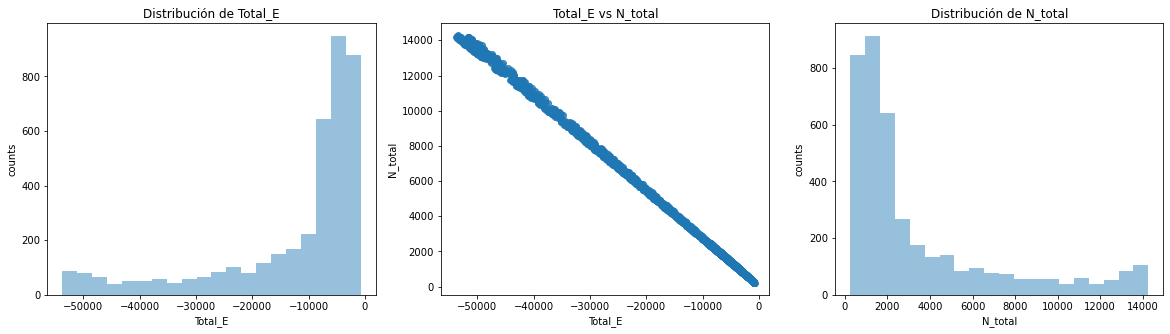

In [37]:
testDeHipotesis(data, 'Total_E', 'N_total')

In [41]:
data.head(4)

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_all,Coord_bulk,Coord_super,N_enlaces,Long_enlaces,Total_E,Energia_Forma,E_atomo
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555,-3.695206
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166,-3.675642
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040,-3.737366
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890,-3.747003


Hipótesis
	 Nula (H0): No exite relación entre Long_enlaces y Volumen
	 Alternativa (HA): Sí exite relación entre Long_enlaces y Volumen
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.21777369564577037, p-value=3.801395457004685e-44
	Correlación Spearman: r=0.23161791486464234, p-value=7.323653770014362e-50
	Correlación Pearson: r=0.16907119681264354, p-value=9.61790481843838e-58
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre Long_enlaces y Volumen
********************************************************************************


9.61790481843838e-58

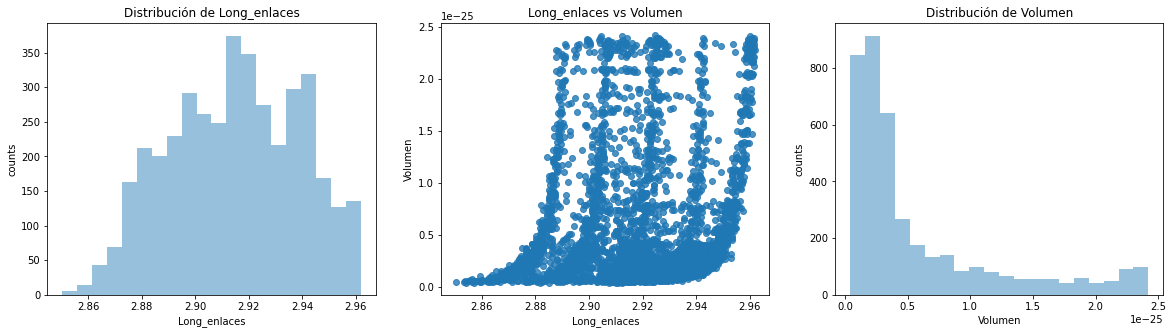

In [42]:
testDeHipotesis(data, "Long_enlaces", "Volumen")

Hipótesis
	 Nula (H0): No exite relación entre ID y FCC
	 Alternativa (HA): Sí exite relación entre ID y FCC
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:


KeyError: 'FCC'

Correlación de Spearman

Dos variables pueden estar relacionadas por una relación no lineal, de modo que la relación sea más fuerte o más débil a lo largo de la distribución de las variables.

Además, las dos variables que se están considerando pueden tener una distribución no gaussiana.

En este caso, el coeficiente de correlación de Spearman (llamado así por Charles Spearman) se puede utilizar para resumir la fuerza entre las dos muestras de datos. Esta prueba de relación también se puede usar si existe una relación lineal entre las variables, pero tendrá un poder ligeramente menor (por ejemplo, puede dar como resultado puntajes de coeficiente más bajos).


Al igual que con el coeficiente de correlación de Pearson, las puntuaciones están entre -1 y 1 para variables perfectamente correlacionadas negativamente y perfectamente correlacionadas positivamente, respectivamente.

En lugar de calcular el coeficiente utilizando la covarianza y las desviaciones estándar de las muestras mismas, estas estadísticas se calculan a partir del rango relativo de valores de cada muestra. Este es un enfoque común utilizado en estadísticas no paramétricas, p. métodos estadísticos en los que no asumimos una distribución de los datos como la gaussiana.

1
Coeficiente de correlación de Spearman = covarianza(rango(X), rango(Y)) / (stdv(rango(X)) * stdv(rango(Y)))
No se supone una relación lineal entre las variables, aunque sí una relación monótona. Este es un nombre matemático para una relación creciente o decreciente entre las dos variables.

Si no está seguro de la distribución y las posibles relaciones entre dos variables, el coeficiente de correlación de Spearman es una buena herramienta para usar.

La función Spearmanr() SciPy se puede utilizar para calcular el coeficiente de correlación de Spearman entre dos muestras de datos con la misma longitud.

Podemos calcular la correlación entre las dos variables en nuestro problema de prueba.

El ejemplo completo se muestra a continuación.

In [19]:
# import pandas as pd
import pandas as pd
  
# list of strings
lst = 20 * randn(1000) + 100
  
# list of int
lst2 = lst+10 * randn(1000) + 50
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Name', 'val'])
df

,Name,val
0,42.978609,102.179395
1,116.462468,166.643461
2,94.505128,159.263819
3,86.237972,139.969957
4,122.401617,185.353449
...,...,...
995,84.977959,131.164890
996,70.012463,130.381328
997,79.998219,136.715575
998,105.233790,160.339398


Ejecutar el ejemplo calcula e imprime el coeficiente de correlación de Spearman.

Sabemos que los datos son gaussianos y que la relación entre las variables es lineal. Sin embargo, el enfoque no paramétrico basado en rangos muestra una fuerte correlación entre las variables de 0,8.

In [20]:
corr, _ = spearmanr(df["Name"], df["val"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.882


Hipótesis
	 Nula (H0): No exite relación entre Name y val
	 Alternativa (HA): Sí exite relación entre Name y val
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.893939945249387, p-value=0.0
	Correlación Spearman: r=0.8819403299403299, p-value=0.0
	Correlación Pearson: r=0.7046006006006007, p-value=4.6033864474229854e-244
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre Name y val
********************************************************************************


0.0

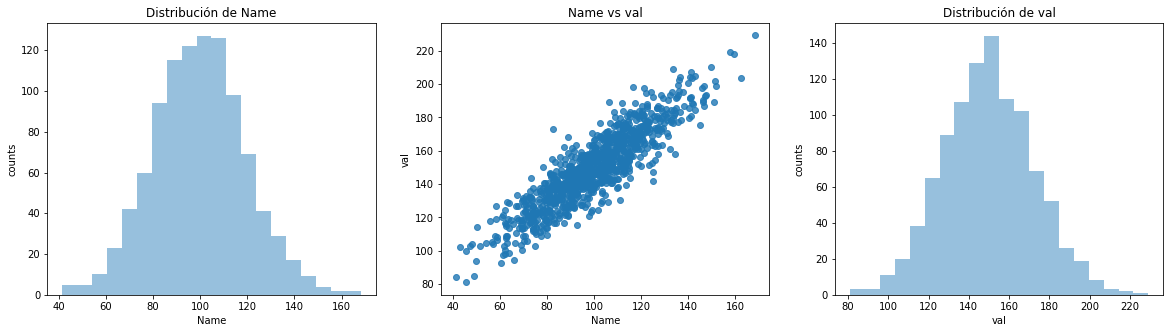

In [21]:
testDeHipotesis(df, "Name", "val")

# Ultimo analisis para elegir correlaciones

In [26]:
data = pd.read_csv("Au_Nano_principal.csv")

In [27]:
data

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_total,...,N_enlaces,Long_enlaces,Total_E,Energia_Forma,E_atomo,FCC,HCP,ICOS,DECA,Estructuras
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,...,8936,2.92220,-5908.6345,343.4555,-3.695206,24,23,2,8,57.0
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,...,9090,2.92505,-6035.4034,384.8166,-3.675642,30,35,1,7,73.0
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,...,26399,2.92120,-17330.1660,800.5040,-3.737366,700,376,0,17,1093.0
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,...,40689,2.91181,-26937.2010,1171.7890,-3.747003,1858,823,0,11,2692.0
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,...,62641,2.91042,-41427.9010,1597.7390,-3.764804,3575,1350,0,28,4953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,...,7923,2.94491,-5346.9589,553.2311,-3.543379,0,0,0,0,0.0
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,...,12167,2.94709,-8218.1252,833.5248,-3.549946,0,0,0,0,0.0
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,...,14805,2.95349,-9876.2899,930.9501,-3.573187,0,0,0,0,0.0
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,...,16920,2.95409,-11261.0810,1047.5990,-3.577218,1,1,0,1,3.0


<AxesSubplot:>

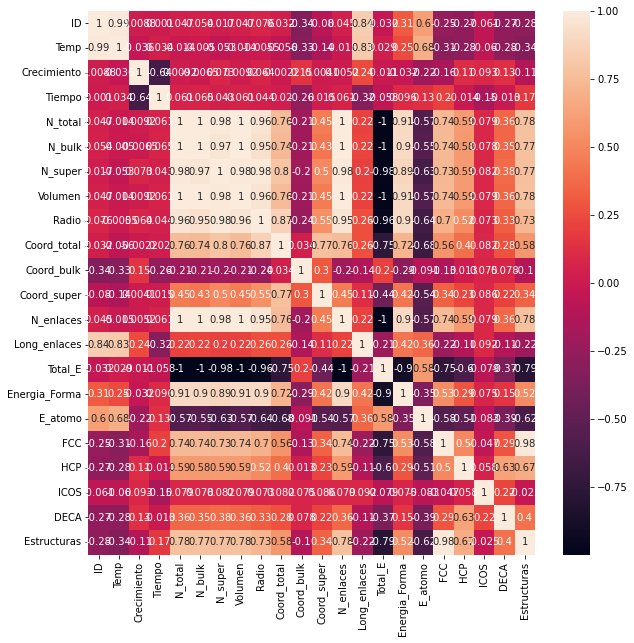

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples.
Python Code


In [34]:
from scipy.stats import spearmanr
for i in range(len(data.columns)-1):
    for j in range(i+1, len(data.columns)):
        #Hacemos una tabla cruzada de la columna i con la j
        #y la metemos en un data frame
        #print("*"*40+"\n", pd.DataFrame(pd.crosstab(data[data.columns[i]], data[data.columns[j]]))) 
        stat, p = spearmanr(data[data.columns[i]], data[data.columns[j]])
        
        if p < 0.05 and stat>0.8:
            print("_"*40)
            print('stat=%.3f, p=%.3f' % (stat, p))
            print(data.columns[i], "con", data.columns[j], 'Probably dependent')
	        
            
        

________________________________________
stat=0.989, p=0.000
ID con Temp Probably dependent
________________________________________
stat=0.847, p=0.000
ID con Long_enlaces Probably dependent
________________________________________
stat=0.822, p=0.000
Temp con Long_enlaces Probably dependent
________________________________________
stat=0.999, p=0.000
N_total con N_bulk Probably dependent
________________________________________
stat=0.996, p=0.000
N_total con N_super Probably dependent
________________________________________
stat=1.000, p=0.000
N_total con Volumen Probably dependent
________________________________________
stat=0.999, p=0.000
N_total con Radio Probably dependent
________________________________________
stat=0.922, p=0.000
N_total con Coord_total Probably dependent
________________________________________
stat=1.000, p=0.000
N_total con N_enlaces Probably dependent
________________________________________
stat=0.994, p=0.000
N_bulk con N_super Probably dependent
____

# Correlaciones E_atomo:
* E_atomo vs N_bulk
* E_atomo vs Coord_bulk
* E_atomo vs N_super
* E_atomo vs Coord_super
* E_atomo vs Estrucutras

In [59]:
%run -i funcionTestDeHipotesis.py

<Figure size 432x288 with 0 Axes>

In [36]:
data

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_total,...,N_enlaces,Long_enlaces,Total_E,Energia_Forma,E_atomo,FCC,HCP,ICOS,DECA,Estructuras
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,...,8936,2.92220,-5908.6345,343.4555,-3.695206,24,23,2,8,57.0
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,...,9090,2.92505,-6035.4034,384.8166,-3.675642,30,35,1,7,73.0
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,...,26399,2.92120,-17330.1660,800.5040,-3.737366,700,376,0,17,1093.0
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,...,40689,2.91181,-26937.2010,1171.7890,-3.747003,1858,823,0,11,2692.0
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,...,62641,2.91042,-41427.9010,1597.7390,-3.764804,3575,1350,0,28,4953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,...,7923,2.94491,-5346.9589,553.2311,-3.543379,0,0,0,0,0.0
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,...,12167,2.94709,-8218.1252,833.5248,-3.549946,0,0,0,0,0.0
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,...,14805,2.95349,-9876.2899,930.9501,-3.573187,0,0,0,0,0.0
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,...,16920,2.95409,-11261.0810,1047.5990,-3.577218,1,1,0,1,3.0


In [46]:
data.columns

Index(['ID', 'Temp', 'Crecimiento', 'Tiempo', 'N_total', 'N_bulk', 'N_super',
       'Volumen', 'Radio', 'Coord_total', 'Coord_bulk', 'Coord_super',
       'N_enlaces', 'Long_enlaces', 'Total_E', 'Energia_Forma', 'E_atomo',
       'FCC', 'HCP', 'ICOS', 'DECA', 'Estructuras'],
      dtype='object')

In [47]:
cols=['N_bulk', 'Coord_bulk', 'N_super', 'Coord_super', 'Estructuras']

In [42]:
np.array(data["E_atomo"])

array([-3.69520607, -3.67564153, -3.73736597, ..., -3.57318737,
       -3.5772176 , -3.57862444])

In [ ]:
for col in cols:
    print(data[col])

In [51]:
for col in cols:
        #Hacemos una tabla cruzada de la columna i con la j
        #y la metemos en un data frame
        #print("*"*40+"\n", pd.DataFrame(pd.crosstab(data["E_atomo"],data[col]))) 
        stat, p = spearmanr(data["E_atomo"],data[col])
        
        #if p < 0.05 and stat>0.8:
        print("_"*40)
        print('stat=%.3f, p=%.3f' % (stat, p))
        print("E_atomo con ", col, 'Probably dependent')

________________________________________
stat=-0.656, p=0.000
E_atomo con  N_bulk Probably dependent
________________________________________
stat=0.021, p=0.194
E_atomo con  Coord_bulk Probably dependent
________________________________________
stat=-0.683, p=0.000
E_atomo con  N_super Probably dependent
________________________________________
stat=-0.512, p=0.000
E_atomo con  Coord_super Probably dependent
________________________________________
stat=-0.754, p=0.000
E_atomo con  Estructuras Probably dependent


________________________________________
Hipótesis
	 Nula (H0): No exite relación entre E_atomo y N_bulk
	 Alternativa (HA): Sí exite relación entre E_atomo y N_bulk
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=-0.5540082409215841, p-value=1.1937e-320
	Correlación Spearman: r=-0.6562366323273905, p-value=0.0
	Correlación Kendall: r=-0.4807695162812103, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre E_atomo y N_bulk
********************************************************************************
***********************

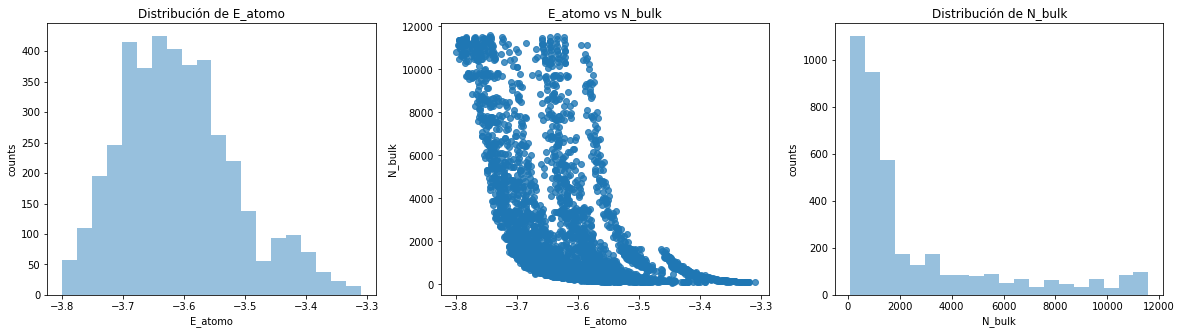

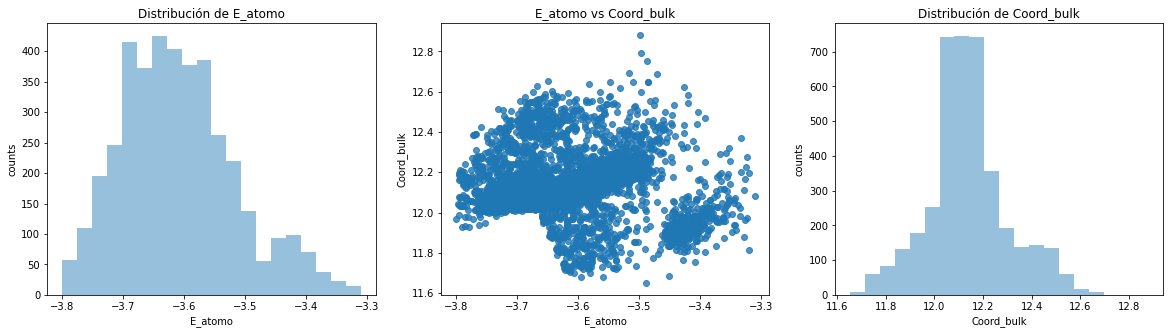

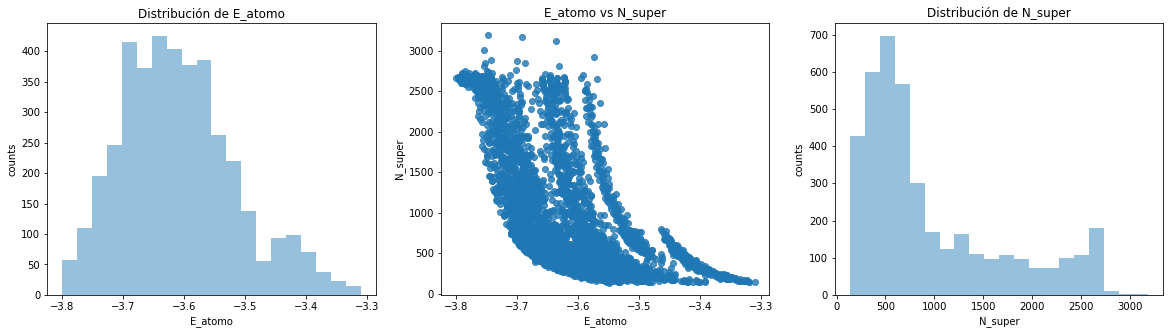

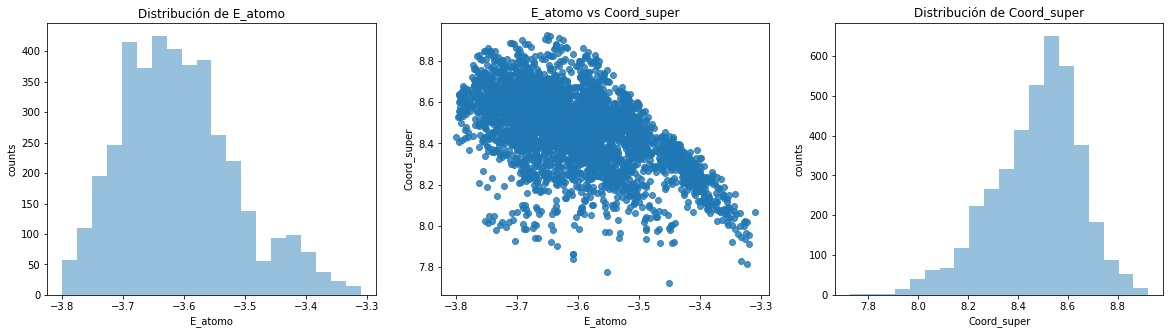

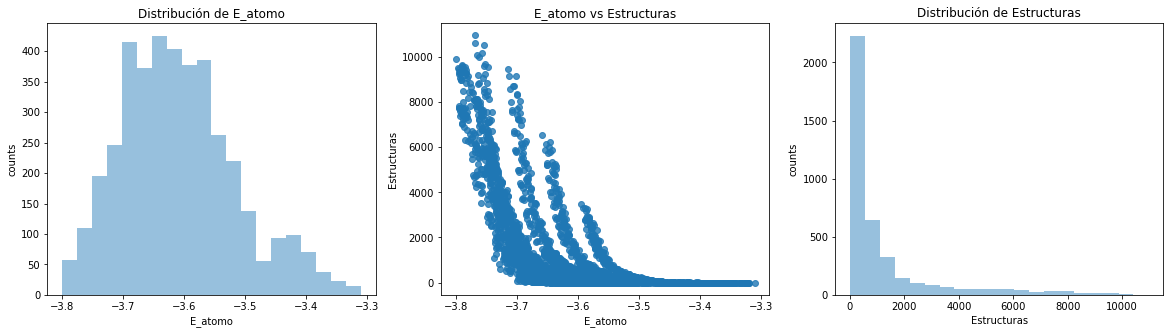

In [54]:
for col in cols:
    
        print("_"*40)
        print(hipotesisCorrelación(data, "E_atomo" , col))

________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=-0.09081691827596522, p-value=8.722632750878945e-09
	Correlación Spearman: r=0.020532452959848933, p-value=0.19417831169915278
	Correlación Kendall: r=0.04235820796532255, p-value=5.912367607422267e-05
********************************************************************************
Se acepta H0 
	 No es posible afirmar correlación significativa entre E_atomo y Coord_bulk
********************************************************************************
********************************************************************************
None
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=-0.5427888761850226, p-value=2.313404937209301e-305
	Correlación Spearman: r=-0.5118793247871645, p-value=4.0938986449225665e-266
	Correlación Kendall: r=-0.36252141958552414, p-value=6.228

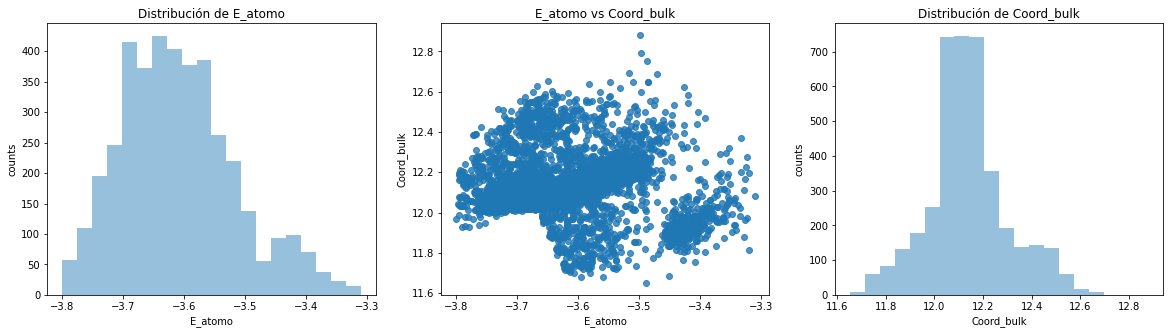

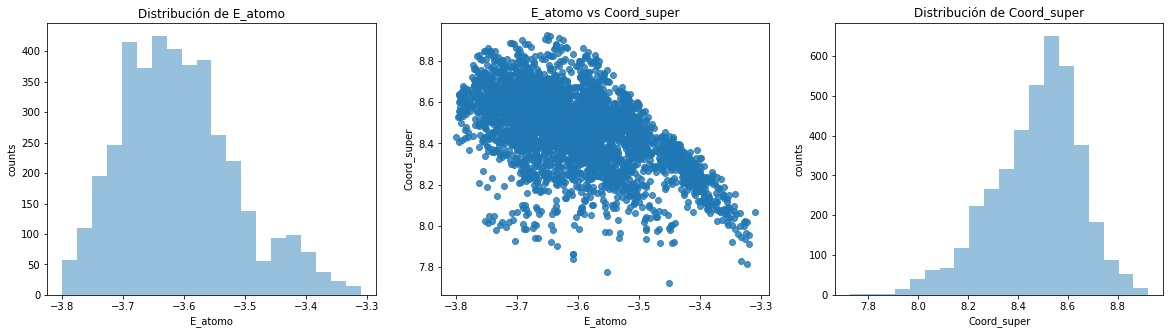

In [66]:
cols=['Coord_bulk','Coord_super']
for col in cols:
        print("_"*40)
        print(hipotesisCorrelación(data, "E_atomo" , col))

In [67]:
data["coord_prop_bulk"]=data["Coord_bulk"]/data["N_total"]*100
data["coord_prop_super"]=data["Coord_super"]/data["N_total"]*100

________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.6171552470098937, p-value=0.0
	Correlación Spearman: r=0.6603918073971349, p-value=0.0
	Correlación Kendall: r=0.48381369533068036, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre E_atomo y coord_prop_bulk
********************************************************************************
********************************************************************************
None
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.621712942145991, p-value=0.0
	Correlación Spearman: r=0.6614064082109278, p-value=0.0
	Correlación Kendall: r=0.48466140768262456, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correl

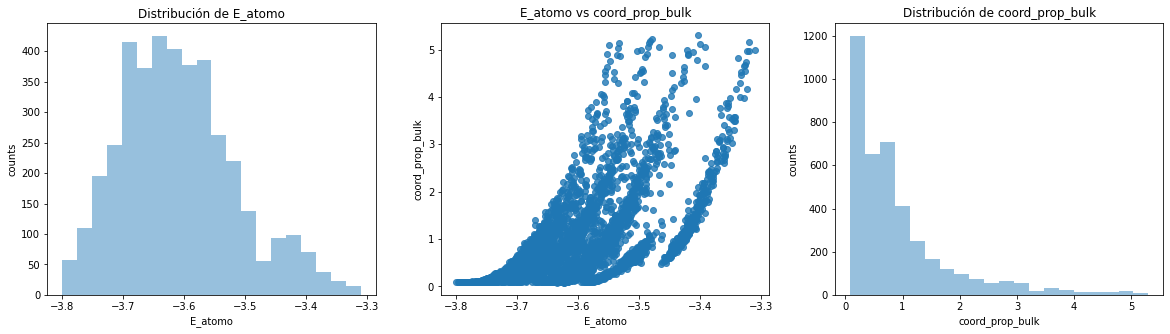

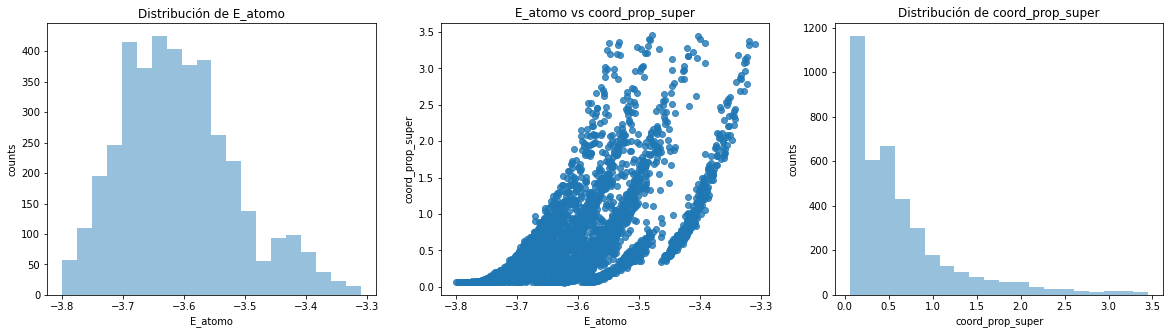

In [68]:
cols=["coord_prop_bulk","coord_prop_super"]
for col in cols:
        print("_"*40)
        print(hipotesisCorrelación(data, "E_atomo" , col))

In [69]:
data.dtypes

ID                    int64
Temp                  int64
Crecimiento         float64
Tiempo                int64
N_total               int64
N_bulk                int64
N_super               int64
Volumen             float64
Radio               float64
Coord_total         float64
Coord_bulk          float64
Coord_super         float64
N_enlaces             int64
Long_enlaces        float64
Total_E             float64
Energia_Forma       float64
E_atomo             float64
FCC                   int64
HCP                   int64
ICOS                  int64
DECA                  int64
Estructuras         float64
N_prop_bulk         float64
N_prop_super        float64
coord_prop_bulk     float64
coord_prop_super    float64
dtype: object

In [70]:
data = pd.read_csv("Au_nanoparticle_dataset.csv")

In [76]:
cols=[]
for i in data:
    if "TCN_" in i:
        cols.append(i)
print(cols)        

['TCN_0', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'TCN_18', 'TCN_19', 'TCN_20']


In [77]:
una=data.loc[1, cols]

In [81]:
una

TCN_0       0.0
TCN_1       3.0
TCN_2       2.0
TCN_3       4.0
TCN_4       4.0
TCN_5       6.0
TCN_6      33.0
TCN_7      70.0
TCN_8     138.0
TCN_9     172.0
TCN_10    105.0
TCN_11    131.0
TCN_12    484.0
TCN_13    392.0
TCN_14     90.0
TCN_15      8.0
TCN_16      0.0
TCN_17      0.0
TCN_18      0.0
TCN_19      0.0
TCN_20      0.0
Name: 1, dtype: float64

In [83]:
if una["TCN_12"]==una.max():
    print("puedes")

puedes


¿Como hago ahora estadisticamente demostrar que la coordinacion 12 siempre se da mas?

Iterar en Filas y ver que siempre "TCN_12" es mayor

In [87]:
len(data)

4000

In [96]:
for i in range(0, len(data)):
    #print(i)
    una=data.loc[i, cols]
    max_12=[]
    j=0
    if una["TCN_12"]==una.max():
        j+=1
print(j)

1
